<a href="https://colab.research.google.com/github/tenoob/NLP/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.4.0'

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [4]:
train_data, validation_data, test_data = tfds.load(name="imdb_reviews",split=('train[:60%]', 'train[60%:]', 'test'), as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7MDMFQ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7MDMFQ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7MDMFQ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [6]:
train_example_batch , train_label_batch = next(iter(train_data.batch(10)))

In [7]:
train_example_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [8]:
train_label_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

building nn

1.   use Word2vec to convert sentance to vectors
2.   by using transfer learning

then build a nn using the word2vec 
1.   List item
2.   List item





In [9]:
pretrained_model = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1")
hub_layer = hub.KerasLayer(pretrained_model , input_shape = [] , dtype = tf.string , trainable = True)

In [10]:
hub_layer(train_example_batch[:2])

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 1.668895  , -3.918618  ,  3.7993348 , -1.4097565 , -3.3214598 ,
        -0.9996616 , -2.0233727 ,  1.2953283 ,  5.0233593 , -1.0990871 ,
        -2.0879953 , -1.2672297 , -0.18820252, -0.07738297, -2.9172704 ,
         1.7943126 ,  1.2375495 , -1.5559573 , -2.4811747 , -0.7813505 ],
       [ 1.7287169 , -2.4736629 ,  3.3280423 ,  0.9174705 , -4.062213  ,
        -4.791508  , -2.7125058 ,  1.2155541 ,  3.7063696 , -0.95357007,
        -1.855471  ,  1.2775491 , -0.07673654,  0.6835056 , -4.822123  ,
         2.6815715 ,  4.479097  , -2.360208  , -3.2802453 , -1.5463475 ]],
      dtype=float32)>

create the actual model

In [11]:
model = tf.keras.Sequential()

In [12]:
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                389380    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 389,733
Trainable params: 389,733
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_data.shuffle(10000).batch(512),
          epochs=20,
          validation_data = validation_data.batch(512),
          verbose=1)

Epoch 1/20
30/30 [==============================] - 4s 78ms/step - loss: 0.7006 - accuracy: 0.5431 - val_loss: 0.6417 - val_accuracy: 0.6538
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.6250 - accuracy: 0.6772 - val_loss: 0.5982 - val_accuracy: 0.7157
Epoch 3/20
30/30 [==============================] - 2s 68ms/step - loss: 0.5850 - accuracy: 0.7222 - val_loss: 0.5629 - val_accuracy: 0.7418
Epoch 4/20
30/30 [==============================] - 3s 72ms/step - loss: 0.5410 - accuracy: 0.7587 - val_loss: 0.5292 - val_accuracy: 0.7634
Epoch 5/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5092 - accuracy: 0.7720 - val_loss: 0.4954 - val_accuracy: 0.7831
Epoch 6/20
30/30 [==============================] - 3s 70ms/step - loss: 0.4640 - accuracy: 0.8032 - val_loss: 0.4646 - val_accuracy: 0.7969
Epoch 7/20
30/30 [==============================] - 2s 70ms/step - loss: 0.4276 - accuracy: 0.8196 - val_loss: 0.4367 - val_accuracy: 0.8127
Epoch 8/20
30

In [35]:
model.predict(['worstmovie ever'])

array([[0.18073356]], dtype=float32)

model evaluation

In [15]:
result = model.evaluate(test_data.batch(512),verbose=2)

49/49 - 2s - loss: 0.3267 - accuracy: 0.8630


In [16]:
for name , value in zip(model.metrics_names , result):
  print(name , " :" , value)

loss  : 0.3267365097999573
accuracy  : 0.8630399703979492


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
import numpy as np

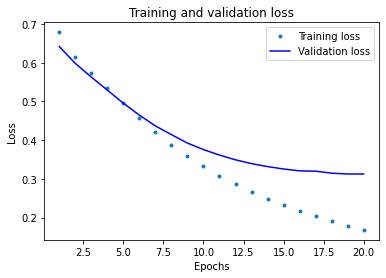

In [29]:
acc = np.array(history_dict['accuracy'])
val_acc = np.array(history_dict['val_accuracy'])
loss = np.array(history_dict['loss'])
val_loss = np.array(history_dict['val_loss'])

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, '.', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

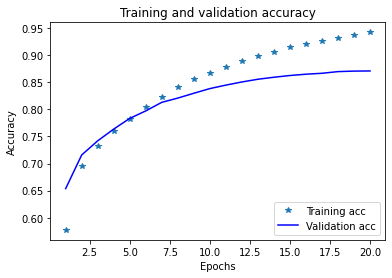

In [28]:

plt.plot(epochs, acc, '*', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()